In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, rand_score, adjusted_rand_score
# from scipy.stats import mode
import time
import pickle

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data Science Project/sample_numeric_data_21_M.csv")
df

,rating,asin,parent_asin,user_id,helpful_vote,verified_purchase,sentiment,month,polarity,subjectivity,text_length,previous_rating,cluster
0,5.0,B074J5WVYH,B0759B7KLH,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,0,1,2,2020-04,0.550000,0.750000,71,5.0,0
1,5.0,B079TRNVHX,B079TRNVHX,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,1,1,2,2020-04,0.408333,0.612821,258,5.0,0
2,5.0,B07194LN2Z,B07194LN2Z,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,0,1,2,2020-02,0.500000,1.000000,8,5.0,0
3,5.0,B005CD4196,B005CD4196,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,7,1,2,2020-02,0.800000,0.750000,34,5.0,0
4,5.0,B07R2X568B,B0BG8M4XW7,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,0,1,1,2020-02,0.000000,0.000000,11,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21640849,5.0,B005DJD2TE,B005DJD2TE,AHMG25IFANOI2QOZSMYN4OFATARQ,0,1,2,2014-06,0.383333,0.333333,152,1.0,0
21640850,5.0,B005DL24JQ,B005DL24JQ,AE477AI63KSB6DM2MJCW5JORWMOQ,2,0,2,2013-04,0.102813,0.590417,129,5.0,1
21640851,4.0,B005DL24JQ,B005DL24JQ,AE2W4AVOENOKJOF3OGP2X3U426XA,0,1,2,2015-09,0.248636,0.530909,420,5.0,2
21640852,2.0,B005DL24JQ,B005DL24JQ,AFI6OPOZQEJZ7WZVUDHJZMZTLYJA,0,0,2,2016-04,0.173310,0.522145,405,4.0,2


In [ ]:
columns_to_drop = ["asin", "parent_asin", "user_id", "cluster", "month"]

# Dropping the columns
df_cleaned = df.drop(columns=columns_to_drop, axis=1)


In [ ]:
df = df_cleaned
df

,rating,helpful_vote,verified_purchase,sentiment,polarity,subjectivity,text_length,previous_rating
0,5.0,0,1,2,0.550000,0.750000,71,5.0
1,5.0,1,1,2,0.408333,0.612821,258,5.0
2,5.0,0,1,2,0.500000,1.000000,8,5.0
3,5.0,7,1,2,0.800000,0.750000,34,5.0
4,5.0,0,1,1,0.000000,0.000000,11,5.0
...,...,...,...,...,...,...,...,...
21640849,5.0,0,1,2,0.383333,0.333333,152,1.0
21640850,5.0,2,0,2,0.102813,0.590417,129,5.0
21640851,4.0,0,1,2,0.248636,0.530909,420,5.0
21640852,2.0,0,0,2,0.173310,0.522145,405,4.0


In [ ]:
# sample_size = 10000  # Select a manageable sample
# df = df.sample(n=sample_size)

test_df = pd.read_csv('/content/drive/MyDrive/Data Science Project/processed_test_dataset.csv')

In [ ]:
test_df.head()

,Unnamed: 0,rating,helpful_vote,verified_purchase,sentiment,polarity,subjectivity,text_length,previous_rating
0,10713074,5.0,0,1,1,0.0,0.0,42,5.0
1,7865882,5.0,0,1,1,0.0,0.0,32,5.0
2,8856127,1.0,0,1,0,-0.1,0.4,19,5.0
3,10733842,3.0,0,1,1,0.0,0.0,24,5.0
4,13702628,5.0,0,1,2,0.5,0.6,22,1.0


In [ ]:
test_df.columns

Index(['Unnamed: 0', 'rating', 'helpful_vote', 'verified_purchase',
       'sentiment', 'polarity', 'subjectivity', 'text_length',
       'previous_rating'],
      dtype='object')

In [ ]:
test_df = test_df.rename(columns={'Unnamed: 0': 'indexes'})

In [ ]:
test_df.columns

Index(['indexes', 'rating', 'helpful_vote', 'verified_purchase', 'sentiment',
       'polarity', 'subjectivity', 'text_length', 'previous_rating'],
      dtype='object')

In [ ]:
df['indexes'] = list(df.index)

In [ ]:
df.head()

,rating,helpful_vote,verified_purchase,sentiment,polarity,subjectivity,text_length,previous_rating,indexes
0,5.0,0,1,2,0.550000,0.750000,71,5.0,0
1,5.0,1,1,2,0.408333,0.612821,258,5.0,1
2,5.0,0,1,2,0.500000,1.000000,8,5.0,2
3,5.0,7,1,2,0.800000,0.750000,34,5.0,3
4,5.0,0,1,1,0.000000,0.000000,11,5.0,4


In [ ]:
train_df = df[~df.index.isin(test_df.index)]

In [ ]:
train_df.head()

,rating,helpful_vote,verified_purchase,sentiment,polarity,subjectivity,text_length,previous_rating,indexes
637707,5.0,0,1,1,0.0000,0.000,72,5.0,637707
637708,5.0,1,1,2,0.2125,0.675,116,5.0,637708
637709,5.0,0,1,2,0.4750,0.725,110,5.0,637709
637710,1.0,1,1,2,0.7000,0.600,46,5.0,637710
637711,5.0,0,1,1,0.0000,0.000,18,1.0,637711


In [ ]:
test_df.head()

,indexes,rating,helpful_vote,verified_purchase,sentiment,polarity,subjectivity,text_length,previous_rating
0,10713074,5.0,0,1,1,0.0,0.0,42,5.0
1,7865882,5.0,0,1,1,0.0,0.0,32,5.0
2,8856127,1.0,0,1,0,-0.1,0.4,19,5.0
3,10733842,3.0,0,1,1,0.0,0.0,24,5.0
4,13702628,5.0,0,1,2,0.5,0.6,22,1.0


In [ ]:
train_df.to_csv('/content/drive/MyDrive/Data Science Project/updated_train_data.csv', index=False)

In [ ]:
train_sentiment = np.array(list(train_df['sentiment']))
test_sentiment = np.array(list(test_df['sentiment']))
train_df = train_df.drop(['sentiment', 'indexes'], axis=1)
test_df = test_df.drop(['sentiment', 'indexes'], axis=1)

In [ ]:
train_df.head()

,rating,helpful_vote,verified_purchase,polarity,subjectivity,text_length,previous_rating
637707,5.0,0,1,0.0000,0.000,72,5.0
637708,5.0,1,1,0.2125,0.675,116,5.0
637709,5.0,0,1,0.4750,0.725,110,5.0
637710,1.0,1,1,0.7000,0.600,46,5.0
637711,5.0,0,1,0.0000,0.000,18,1.0


In [ ]:
test_df.head()

,rating,helpful_vote,verified_purchase,polarity,subjectivity,text_length,previous_rating
0,5.0,0,1,0.0,0.0,42,5.0
1,5.0,0,1,0.0,0.0,32,5.0
2,1.0,0,1,-0.1,0.4,19,5.0
3,3.0,0,1,0.0,0.0,24,5.0
4,5.0,0,1,0.5,0.6,22,1.0


In [ ]:
train_data = train_df.iloc[:,:].values
test_data = test_df.iloc[:,:].values

In [ ]:
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.fit_transform(test_data)

In [ ]:
train_data_scaled.shape, test_data_scaled.shape

((21003147, 7), (637707, 7))

In [ ]:
start_time = time.time()
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(train_data_scaled)
kmeans_training_time = time.time() - start_time
print(f"KMeans Training Time: {kmeans_training_time:.4f} seconds")

KMeans Training Time: 10.0755 seconds


In [ ]:
kmeans_wcss = kmeans.inertia_
print("KMeans WCSS Score:", kmeans_wcss)

KMeans WCSS Score: 107292249.30367804


In [ ]:
# taken reference from https://www.kaggle.com/code/mohamedkhaledidris/clustering-using-k-means-algorithm
with open('/content/drive/MyDrive/Data Science Project/kmeans.pkl', 'wb') as file:
  pickle.dump(kmeans, file)

In [ ]:
kmeans

KMeans(n_clusters=3, random_state=42)

In [ ]:
cluster_labels = kmeans.labels_

In [ ]:
def map_clusters_to_labels(clusters, true_labels):
    mapping = {}
    already_assigned = []
    for cluster in set(clusters):
        # print(cluster)
        cluster_indices = [i for i, c in enumerate(clusters) if c == cluster]
        cluster_true_labels = [true_labels[i] for i in cluster_indices]
        if not cluster_true_labels:
            print(f"No true labels found for cluster {cluster}. Skipping...")
            continue
        count_zero = list(cluster_true_labels).count(0)
        count_one = list(cluster_true_labels).count(1)
        count_two = list(cluster_true_labels).count(2)
        zero = 0
        one = 1
        two = 2
        # print(count_zero, count_one, count_two)
        if ((count_zero > count_one) and (count_zero > count_two)):
          if zero not in set(already_assigned):
            already_assigned.append(0)
            mapping[cluster] = 0
          else:
            if count_one > count_two:
              if one not in set(already_assigned):
                already_assigned.append(1)
                mapping[cluster] = 1
              else:
                already_assigned.append(2)
                mapping[cluster] = 2
            else:
              if two not in set(already_assigned):
                already_assigned.append(2)
                mapping[cluster] = 2
              else:
                already_assigned.append(1)
                mapping[cluster] = 1
        elif ((count_one > count_zero) and (count_one > count_two)):
          if one not in set(already_assigned):
            already_assigned.append(1)
            mapping[cluster] = 1
          else:
            if count_zero > count_two:
              if zero not in set(already_assigned):
                already_assigned.append(0)
                mapping[cluster] = 0
              else:
                already_assigned.append(2)
                mapping[cluster] = 2
            else:
              if two not in set(already_assigned):
                already_assigned.append(2)
                mapping[cluster] = 2
              else:
                already_assigned.append(0)
                mapping[cluster] = 0
        else:
          if two not in set(already_assigned):
            already_assigned.append(2)
            mapping[cluster] = 2
          else:
            if count_one > count_zero:
              if one not in set(already_assigned):
                already_assigned.append(1)
                mapping[cluster] = 1
              else:
                already_assigned.append(0)
                mapping[cluster] = 0
            else:
              if zero not in set(already_assigned):
                already_assigned.append(0)
                mapping[cluster] = 0
              else:
                already_assigned.append(1)
                mapping[cluster] = 1
    return mapping

In [ ]:
cluster_to_label = map_clusters_to_labels(cluster_labels, train_sentiment)

In [ ]:
cluster_to_label

{0: 2, 1: 1, 2: 0}

In [ ]:
predicted_clusters = kmeans.predict(test_data_scaled)

In [ ]:
predicted_clusters.shape

(637707,)

In [ ]:
y_pred = [cluster_to_label[cluster] for cluster in predicted_clusters]

In [ ]:
kmeans_accuracy = accuracy_score(test_sentiment, y_pred)
print(f"KMeans Accuracy: {kmeans_accuracy * 100:.2f}%")

KMeans Accuracy: 69.13%


In [ ]:
wrs = rand_score(test_sentiment, predicted_clusters)
wadjrs = adjusted_rand_score(test_sentiment, predicted_clusters)
print(f"Rand Score: {wrs}")
print(f"Adjusted Rand Score: {wadjrs}")

Rand Score: 0.7004561036370983
Adjusted Rand Score: 0.32761771788406285


In [ ]:
rs = rand_score(test_sentiment, y_pred)
adjrs = adjusted_rand_score(test_sentiment, y_pred)
print(f"Rand Score: {rs}")
print(f"Adjusted Rand Score: {adjrs}")

Rand Score: 0.7004561036370983
Adjusted Rand Score: 0.32761771788406285


# GMM

In [ ]:
start_time = time.time()
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(train_data_scaled)
gmm_training_time = time.time() - start_time
print(f"GMM Training Time: {gmm_training_time:.4f} seconds")

GMM Training Time: 266.0160 seconds


In [ ]:
# taken reference from https://www.kaggle.com/code/mohamedkhaledidris/clustering-using-k-means-algorithm
with open('/content/drive/MyDrive/Data Science Project/gaussian_mixture.pkl', 'wb') as file:
  pickle.dump(gmm, file)

In [ ]:
gmm_labels = gmm.predict(train_data_scaled)
gmm_cluster_centers = gmm.means_

In [ ]:
gmm_wcss = 0
for i in range(3):
    cluster_points = train_data_scaled[gmm_labels == i]
    gmm_wcss += np.sum(np.linalg.norm(cluster_points - gmm_cluster_centers[i], axis=1)**2)

In [ ]:
print("GMM WCSS Score:", gmm_wcss)

GMM WCSS Score: 126641886.7234741


In [ ]:
gmm_cluster_to_label = map_clusters_to_labels(gmm_labels, train_sentiment)

In [ ]:
gmm_cluster_to_label

{0: 2, 1: 0, 2: 1}

In [ ]:
gmm_predicted = gmm.predict(test_data_scaled)

In [ ]:
gmm_predicted.shape

(637707,)

In [ ]:
y_pred_gmm = [gmm_cluster_to_label[cluster] for cluster in gmm_predicted]

In [ ]:
gmm_accuracy = accuracy_score(test_sentiment, y_pred_gmm)
print(f"GMM Accuracy: {gmm_accuracy * 100:.2f}%")

GMM Accuracy: 25.81%


In [ ]:
print(f"GMM Accuracy: {accuracy_score(test_sentiment, gmm_predicted) * 100:.2f}%")

GMM Accuracy: 27.38%


In [ ]:
gmm_wrs = rand_score(test_sentiment, gmm_predicted)
gmm_wadjrs = adjusted_rand_score(test_sentiment, gmm_predicted)
print(f"Rand Score: {gmm_wrs}")
print(f"Adjusted Rand Score: {gmm_wadjrs}")

Rand Score: 0.48333406125279044
Adjusted Rand Score: 0.06592504650812585


In [ ]:
gmm_rs = rand_score(test_sentiment, y_pred_gmm)
gmm_adjrs = adjusted_rand_score(test_sentiment, y_pred_gmm)
print(f"Rand Score: {gmm_rs}")
print(f"Adjusted Rand Score: {gmm_adjrs}")

Rand Score: 0.48333406125279044
Adjusted Rand Score: 0.06592504650812585


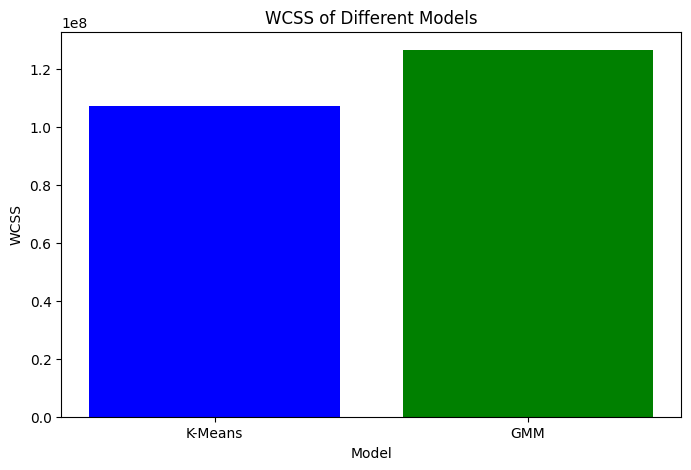

In [ ]:
categories = ["K-Means", "GMM"]
values = [kmeans_wcss, gmm_wcss]

plt.figure(figsize=(8, 5))
plt.bar(categories, values, color=['blue', 'green'])
plt.xlabel("Model")
plt.ylabel("WCSS")
plt.title("WCSS of Different Models")
plt.show()

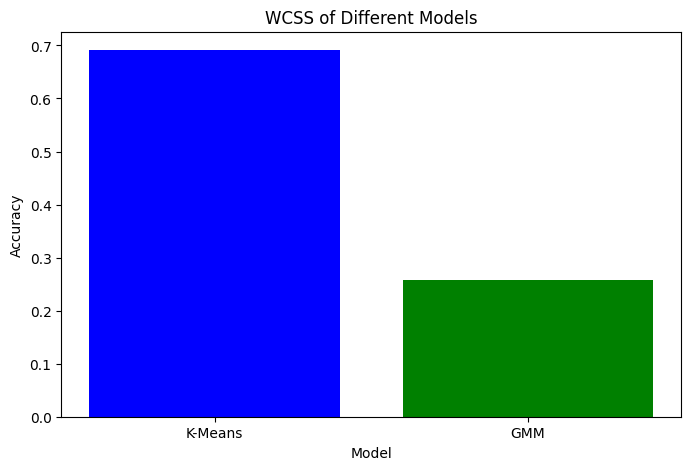

In [ ]:
categories = ["K-Means", "GMM"]
values = [kmeans_accuracy, gmm_accuracy]

plt.figure(figsize=(8, 5))
plt.bar(categories, values, color=['blue', 'green'])
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("WCSS of Different Models")
plt.show()

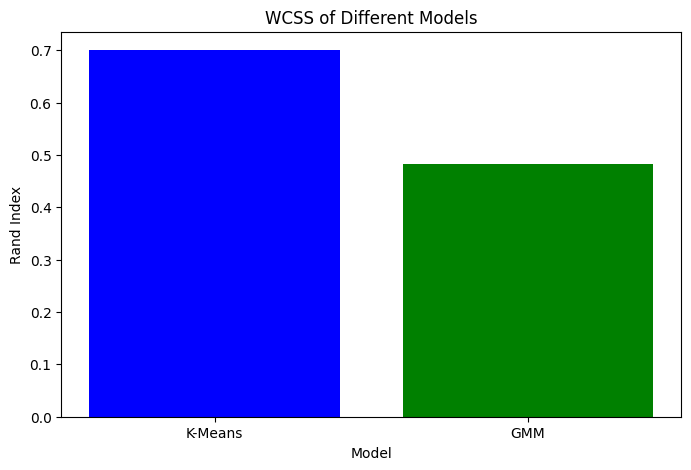

In [ ]:
categories = ["K-Means", "GMM"]
values = [rs, gmm_rs]

plt.figure(figsize=(8, 5))
plt.bar(categories, values, color=['blue', 'green'])
plt.xlabel("Model")
plt.ylabel("Rand Index")
plt.title("WCSS of Different Models")
plt.show()

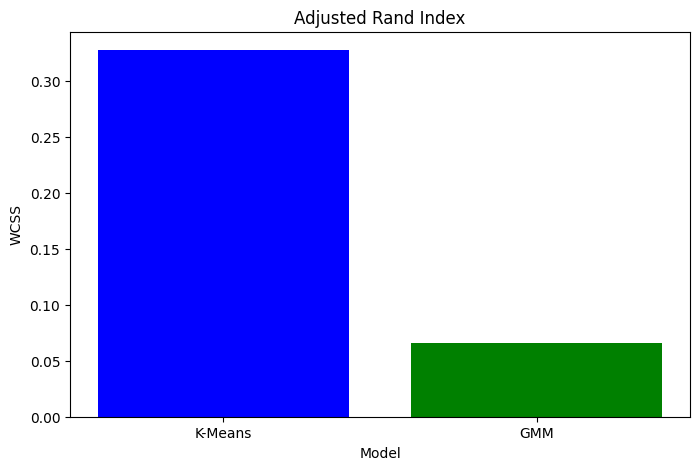

In [ ]:
categories = ["K-Means", "GMM"]
values = [adjrs, gmm_adjrs]

plt.figure(figsize=(8, 5))
plt.bar(categories, values, color=['blue', 'green'])
plt.xlabel("Model")
plt.ylabel("WCSS")
plt.title("Adjusted Rand Index")
plt.show()